### Create a Combined Database with Mean Age and Variance by Region Maternal Mortality, Mean and Variance of Adolescent Age Maternal Mortality by Region, GDP by Region, and Population by Region in Mexico.
- This requires the combination of res_dataset (with each Region mean and variance for total and adolescent maternal mortality), metro_by_region (with Metropolitan Areas organized by Region), and mexico_gdp (with GDP values organized by Metropolitan Areas). 

In [72]:
# Import the relevant python libraries for the analysis
import pandas as pd
from pandas import DataFrame
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pylab as pl


# Statistics
import statistics
import scipy.stats as stats
import random
import math
import re
%matplotlib inline

In [73]:
# Load and test Metro by Region dataset and set the index if applicable
metro_by_region = pd.read_excel('data/metro_area_by_state.xlsx')
metro_by_region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 5 columns):
Name               74 non-null object
Status             74 non-null object
State(s)           74 non-null object
Population 2010    74 non-null float64
Population 2015    74 non-null float64
dtypes: float64(2), object(3)
memory usage: 3.0+ KB


In [74]:
# Load and test Mexico GDP by Region dataset and set the index if applicable
mexico_gdp = pd.read_csv('data/mexico_region_gdp_per_capita.csv')
mexico_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 3 columns):
Metropolitan Areas    64 non-null object
Year_2010             64 non-null object
Year_2015             64 non-null object
dtypes: object(3)
memory usage: 1.6+ KB


### Step 1: Explore metro_by_region and mexico_gdp Datasets and Create Clean Sub-Dataframes for Analysis

#### metro_by_region

In [75]:
metro_by_region.head()

,Name,Status,State(s),Population 2010,Population 2015
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,Acapulco,Metropolitan Area,Guerrero,863431.0,886975.0
3,Acayucan,Metropolitan Area,Veracruz de Ignacio de la Llave,112996.0,120340.0
4,Aguascalientes,Metropolitan Area,Aguascalientes,932369.0,1044049.0


##### Remove Irregular Values
- Case 1: Remove all rows with 'NaN' in the column values.

In [76]:
#Drop NaN values 
metro_by_region = metro_by_region.dropna()
metro_by_region.head()

,Name,Status,State(s),Population 2010,Population 2015
2,Acapulco,Metropolitan Area,Guerrero,863431.0,886975.0
3,Acayucan,Metropolitan Area,Veracruz de Ignacio de la Llave,112996.0,120340.0
4,Aguascalientes,Metropolitan Area,Aguascalientes,932369.0,1044049.0
5,Campeche,Metropolitan Area,Campeche,259005.0,283025.0
6,Cancún,Metropolitan Area,Quintana Roo,677379.0,763121.0


In [77]:
# Organize dataset by State in alphabetical order
metro_by_region = metro_by_region.sort_values(by=['State(s)'],ascending=True)
metro_by_region.head()

,Name,Status,State(s),Population 2010,Population 2015
4,Aguascalientes,Metropolitan Area,Aguascalientes,932369.0,1044049.0
64,Tijuana,Metropolitan Area,Baja California,1751430.0,1840710.0
20,Ensenada,Metropolitan Area,Baja California,466814.0,486639.0
34,Mexicali,Metropolitan Area,Baja California,936826.0,988417.0
28,La Paz,Metropolitan Area,Baja California Sur,251871.0,272711.0


In [78]:
# Reset index 
metro_by_region = metro_by_region.reset_index()
metro_by_region.head()

,index,Name,Status,State(s),Population 2010,Population 2015
0,4,Aguascalientes,Metropolitan Area,Aguascalientes,932369.0,1044049.0
1,64,Tijuana,Metropolitan Area,Baja California,1751430.0,1840710.0
2,20,Ensenada,Metropolitan Area,Baja California,466814.0,486639.0
3,34,Mexicali,Metropolitan Area,Baja California,936826.0,988417.0
4,28,La Paz,Metropolitan Area,Baja California Sur,251871.0,272711.0


In [79]:
# Drop index column
metro_by_region = metro_by_region.drop(columns='index')
metro_by_region.head()

,Name,Status,State(s),Population 2010,Population 2015
0,Aguascalientes,Metropolitan Area,Aguascalientes,932369.0,1044049.0
1,Tijuana,Metropolitan Area,Baja California,1751430.0,1840710.0
2,Ensenada,Metropolitan Area,Baja California,466814.0,486639.0
3,Mexicali,Metropolitan Area,Baja California,936826.0,988417.0
4,La Paz,Metropolitan Area,Baja California Sur,251871.0,272711.0


#### mexico_gdp

In [80]:
mexico_gdp.head(31)

,Metropolitan Areas,Year_2010,Year_2015
0,MEX51: Minatitlan,12108,12105
1,MEX58: Campeche,..,..
2,MEX46: Victoria,17832,17581
3,MEX30: Durango,13269,13849
4,MEX04: Puebla,10304,10681
5,MEX38: Tepic,11481,11647
6,MEX42: Nuevo Laredo,18320,17581
7,MEX39: Orizaba,12337,12105
8,MEX53: Chilpancingo de los Bravo,8320,8062
9,MEX35: Matamoros,17302,17580


In [81]:
mexico_gdp.tail(31)

,Metropolitan Areas,Year_2010,Year_2015
33,MEX07: Leon,12476,14428
34,MEX48: Cordoba,12131,12105
35,MEX49: Uruapan,10191,10430
36,MEX10: Juarez,15330,18101
37,MEX08: Queretaro,19732,21741
38,MEX25: Reynosa,19755,17549
39,MEX09: Merida,12688,13672
40,MEX36: Ensenada,17723,19041
41,MEX13: Mexicali,17468,19048
42,MEX45: Tapachula,7169,6696


*Preliminary Observations*: When exploring the data found in mexico_gdp, I found the GDP data for Campeche and Mexico were missing. I assumed that the GDP values did not transfer over from OCED.stat, but upon further review of the OCED.stat database, Campeche and Mexico GDP information were not available. Since GDP is to be used as a potential predictive factor for maternal mortality, the assessment of Campeche, individually, will be weakened without this data. Therefore, although there are values missing, the overall purpose of this dataset is to merge it with other factors potentially involved in maternal mortality, so these rows will remain in the dataset.

In [82]:
# Create a Dataframe to store data types in mexico_gdp
mex_gdp_dtypes = pd.DataFrame(mexico_gdp.dtypes)

#Rename column name to DataType
mex_gdp_dtypes = mex_gdp_dtypes.rename(columns={0:'DataType'})

#Analyze Missing Values
mex_gdp_dtypes['MissingVal'] = mexico_gdp.isnull().sum()

#Identify number of unique values
mex_gdp_dtypes['NumUnique'] = mexico_gdp.nunique()

#Identify the count for each variable
mex_gdp_dtypes['Count']= mexico_gdp.count()
mex_gdp_dtypes

,DataType,MissingVal,NumUnique,Count
Metropolitan Areas,object,0,64,64
Year_2010,object,0,63,64
Year_2015,object,0,43,64


**Conclusion**: The dataset seems rather clean as there are no missing values aside from those referenced above. Now, the list of 'Metropolitan areas' needs to be catagorized into the 32 Provinces within Mexico.

In [83]:
list(np.unique(mexico_gdp['Metropolitan Areas']))

['MEX01: Mexico City',
 'MEX02: Guadalajara',
 'MEX03: Monterrey',
 'MEX04: Puebla',
 'MEX05: Toluca',
 'MEX06: Tijuana',
 'MEX07: Leon',
 'MEX08: Queretaro',
 'MEX09: Merida',
 'MEX10: Juarez',
 'MEX11: San Luis Potosi',
 'MEX12: Torreon',
 'MEX13: Mexicali',
 'MEX14: Cuernavaca',
 'MEX15: Centro',
 'MEX16: Culiacan',
 'MEX17: Morelia',
 'MEX18: Chihuahua',
 'MEX19: Veracruz',
 'MEX20: Hermosillo',
 'MEX21: Aguascalientes',
 'MEX22: Acapulco de Juarez',
 'MEX23: Tampico',
 'MEX24: Oaxaca de Juarez',
 'MEX25: Reynosa',
 'MEX26: Xalapa',
 'MEX27: Saltillo',
 'MEX28: Benito Juarez',
 'MEX29: Celaya',
 'MEX30: Durango',
 'MEX31: Tuxtla Gutierrez',
 'MEX32: Pachuca de Soto',
 'MEX33: Irapuato',
 'MEX34: Ahome',
 'MEX35: Matamoros',
 'MEX36: Ensenada',
 'MEX37: Poza Rica de Hidalgo',
 'MEX38: Tepic',
 'MEX39: Orizaba',
 'MEX40: Mazatlan',
 'MEX41: Cajeme',
 'MEX42: Nuevo Laredo',
 'MEX43: Guadalupe',
 'MEX44: Coatzacoalcos',
 'MEX45: Tapachula',
 'MEX46: Victoria',
 'MEX47: Tlaxcala',
 'MEX

In [84]:
# Convert number objects in Year_2010 and Year_2015 to numbers

# Year_2010
mexico_gdp['Year_2010'] = pd.to_numeric(mexico_gdp['Year_2010'], errors='coerce')

# Year_2015
mexico_gdp['Year_2015'] = pd.to_numeric(mexico_gdp['Year_2015'], errors='coerce')

# Verify object datatypes were switched to numbers
mexico_gdp.dtypes

Metropolitan Areas     object
Year_2010             float64
Year_2015             float64
dtype: object

In [85]:
# Run descriptive statistics of number datatypes
mexico_gdp.describe(include=['number'])

,Year_2010,Year_2015
count,62.000000,62.000000
mean,15115.596774,15444.177419
std,5268.897192,4965.949402
min,7102.000000,6696.000000
25%,12094.500000,11947.000000
50%,13550.500000,14661.000000
75%,17804.750000,19045.500000
max,31370.000000,28251.000000


In [86]:
# Reindex by Metropolitan Area
mexico_gdp = mexico_gdp.sort_values(by=['Metropolitan Areas'],ascending=True)

# Reset the Index
mexico_gdp = mexico_gdp.reset_index()
mexico_gdp.head()

,index,Metropolitan Areas,Year_2010,Year_2015
0,16,MEX01: Mexico City,21553.0,22587.0
1,31,MEX02: Guadalajara,16572.0,17636.0
2,22,MEX03: Monterrey,31365.0,28251.0
3,4,MEX04: Puebla,10304.0,10681.0
4,21,MEX05: Toluca,10423.0,10633.0


In [87]:
# Remove New Index Column
mexico_gdp = mexico_gdp.drop(['index'], axis=1)
mexico_gdp.head()

,Metropolitan Areas,Year_2010,Year_2015
0,MEX01: Mexico City,21553.0,22587.0
1,MEX02: Guadalajara,16572.0,17636.0
2,MEX03: Monterrey,31365.0,28251.0
3,MEX04: Puebla,10304.0,10681.0
4,MEX05: Toluca,10423.0,10633.0


In [88]:
# Change the column names to be more clear
mexico_gdp.columns = ['Metropolitan Areas', 'Metro GDP 2010', 'Metro GDP 2015']
mexico_gdp.head()

,Metropolitan Areas,Metro GDP 2010,Metro GDP 2015
0,MEX01: Mexico City,21553.0,22587.0
1,MEX02: Guadalajara,16572.0,17636.0
2,MEX03: Monterrey,31365.0,28251.0
3,MEX04: Puebla,10304.0,10681.0
4,MEX05: Toluca,10423.0,10633.0


#### Fix the Metropolitan Names in Preparation for Data Merging

In [89]:
# Create an empty list to store new Metropolitan Areas string
metro_areas = []

# Iterate through Metropolitan Areas to Remove the MEX## from the string and add to metro_areas
for metro in mexico_gdp['Metropolitan Areas']:
    """Remove MEX##: from Metropolitan Area Strings."""
    
    # Remove all numbers from each Metro Area string
    metro_no_numbers = re.sub("\d+", " ", metro)
    
    # Remove all 'MEX : ' from each Metro Area string
    metro_new_string = metro_no_numbers.replace('MEX : ', '')
    metro_new_string = metro_new_string.replace('MEX: ', '')
    
    # Create new Metro Area Column in mexico_gdp with metro_str_modified
    metro_areas.append(metro_new_string)

In [90]:
# Convert the list to a Series and add as new column to res_dataset
mexico_gdp['Metro Areas'] = pd.Series(metro_areas)
mexico_gdp['Metro Areas'].head()

0    Mexico City
1    Guadalajara
2      Monterrey
3         Puebla
4         Toluca
Name: Metro Areas, dtype: object

In [91]:
mexico_gdp.head()

,Metropolitan Areas,Metro GDP 2010,Metro GDP 2015,Metro Areas
0,MEX01: Mexico City,21553.0,22587.0,Mexico City
1,MEX02: Guadalajara,16572.0,17636.0,Guadalajara
2,MEX03: Monterrey,31365.0,28251.0,Monterrey
3,MEX04: Puebla,10304.0,10681.0,Puebla
4,MEX05: Toluca,10423.0,10633.0,Toluca


In [92]:
# Drop 'Metropolitan Areas' column as it is unnecessary
mexico_gdp = mexico_gdp.drop(columns='Metropolitan Areas')
mexico_gdp.head()

,Metro GDP 2010,Metro GDP 2015,Metro Areas
0,21553.0,22587.0,Mexico City
1,16572.0,17636.0,Guadalajara
2,31365.0,28251.0,Monterrey
3,10304.0,10681.0,Puebla
4,10423.0,10633.0,Toluca


### Step 2: Merging 3 Dataframes
- Part 1: Match *metro_by_region[State(s]* dataset with *res_dataset* dataset by the 'Providence' columns
- Part 2: Match *metro_by_region['Name']* dataset with *res_dataset* dataset by the 'Metropolitan' columns
- Part 3: Merge *metro_by_region* with *mexico_gdp*
- Part 4: Merge combined *metro_by_region*/*mexico_gdp* with *res_dataset*

### Part 1: Prepare Data for merging *metro_by_region['State(s)']* with *dates['Residence Name']*

#### Assess States/Provinces format in *res_dataset['Region']*

In [95]:
# Open res_dataset as a global variable that can be uploaded to other Jupyter Notebooks
%store -r res_dataset

In [96]:
print('In res_dataset[Region], there are '+ str(len(np.unique(res_dataset['Region']))) + ' States in Mexico.')
list(np.unique(res_dataset['Region']))

In res_dataset[Region], there are 32 States in Mexico.


['Aguascalientes',
 'Baja California',
 'Baja California Sur',
 'Campeche',
 'Chiapas',
 'Chihuahua',
 'Coahuila de Zaragoza',
 'Colima',
 'Distrito Federal',
 'Durango',
 'Guanajuato',
 'Guerrero',
 'Hidalgo',
 'Jalisco',
 'Michoacán de Ocampo',
 'Morelos',
 'México',
 'Nayarit',
 'Nuevo León',
 'Oaxaca',
 'Puebla',
 'Querétaro Arteaga',
 'Quintana Roo',
 'San Luis Potosí',
 'Sinaloa',
 'Sonora',
 'Tabasco',
 'Tamaulipas',
 'Tlaxcala',
 'Veracruz de Ignacio de la Llave',
 'Yucatán',
 'Zacatecas']

#### Assess States/Provinces format in *metro_by_region['State(s)']*

In [97]:
# Assess the number of Mexico States in dataset
print('The Number of Mexican States in this Dataset is: ',len(metro_by_region['State(s)'].unique()))
list(metro_by_region['State(s)'].unique())

The Number of Mexican States in this Dataset is:  37


['Aguascalientes',
 'Baja California',
 'Baja California Sur',
 'Campeche',
 'Chiapas',
 'Chihuahua',
 'Ciudad de México / Hidalgo / México',
 'Coahuila de Zaragoza',
 'Coahuila de Zaragoza / Durango',
 'Colima',
 'Durango',
 'Guanajuato',
 'Guanajuato / Michoacán de Ocampo',
 'Guerrero',
 'Hidalgo',
 'Jalisco',
 'Jalisco / Nayarit',
 'Michoacán de Ocampo',
 'Morelos',
 'México',
 'Nayarit',
 'Nuevo León',
 'Oaxaca',
 'Puebla',
 'Puebla / Tlaxcala',
 'Querétaro / Guanajuato',
 'Quintana Roo',
 'San Luis Potosí',
 'Sinaloa',
 'Sonora',
 'Tabasco',
 'Tamaulipas',
 'Tamaulipas / Veracruz de Ignacio de la Llave',
 'Tlaxcala',
 'Veracruz de Ignacio de la Llave',
 'Yucatán',
 'Zacatecas']

#### Observations:
As stated when originally cleaning the *res_dataset* in average_age_maternal_mortality Jupyter Notebook, there are 31 states and 1 federal entity in Mexico. Therefore, the length of the metro_by_regions['State(s)'] column is too long at 37 entries. When looking over the list of regions within the dataset, it becomes apparent that there are duplicate entries of States within Mexico, and need to be combined together. Namely:
- 'Coahuila de Zaragoza' = 'Coahuila de Zaragoza' + 'Coahuila de Zaragoza / Durango'
- 'Guanajuato' =  'Guanajuato'+ 'Guanajuato / Michoacán de Ocampo'
- 'Jalisco' =  'Jalisco'+ 'Jalisco / Nayarit'
- 'Puebla' = 'Puebla' + 'Puebla / Tlaxcala'

#### Fix State Names in metro_by_region['States'] dataset

In [98]:
metro_by_region.head()

,Name,Status,State(s),Population 2010,Population 2015
0,Aguascalientes,Metropolitan Area,Aguascalientes,932369.0,1044049.0
1,Tijuana,Metropolitan Area,Baja California,1751430.0,1840710.0
2,Ensenada,Metropolitan Area,Baja California,466814.0,486639.0
3,Mexicali,Metropolitan Area,Baja California,936826.0,988417.0
4,La Paz,Metropolitan Area,Baja California Sur,251871.0,272711.0


In [99]:
# Replace the duplicate 5 Mexican State names with name matching the dates dataset 

#Coahuila de Zaragoza
metro_by_region = metro_by_region.replace('Coahuila de Zaragoza / Durango', 'Coahuila de Zaragoza')

#Guanajuato
metro_by_region = metro_by_region.replace('Guanajuato / Michoacán de Ocampo','Guanajuato')

#Jalisco
metro_by_region = metro_by_region.replace('Jalisco / Nayarit', 'Jalisco')

#Puebla
metro_by_region = metro_by_region.replace('Puebla / Tlaxcala', 'Puebla')

#Tamaulipas
metro_by_region = metro_by_region.replace('Tamaulipas / Veracruz de Ignacio de la Llave', 'Tamaulipas')

In [100]:
# Assess the resulting number of Mexico States in dataset
print('The New Number of Mexican States in this Dataset is: ',len(metro_by_region['State(s)'].unique()))
list(metro_by_region['State(s)'].unique())

The New Number of Mexican States in this Dataset is:  32


['Aguascalientes',
 'Baja California',
 'Baja California Sur',
 'Campeche',
 'Chiapas',
 'Chihuahua',
 'Ciudad de México / Hidalgo / México',
 'Coahuila de Zaragoza',
 'Colima',
 'Durango',
 'Guanajuato',
 'Guerrero',
 'Hidalgo',
 'Jalisco',
 'Michoacán de Ocampo',
 'Morelos',
 'México',
 'Nayarit',
 'Nuevo León',
 'Oaxaca',
 'Puebla',
 'Querétaro / Guanajuato',
 'Quintana Roo',
 'San Luis Potosí',
 'Sinaloa',
 'Sonora',
 'Tabasco',
 'Tamaulipas',
 'Tlaxcala',
 'Veracruz de Ignacio de la Llave',
 'Yucatán',
 'Zacatecas']

**Further Comments**: There are now the correct number of Mexican States in the metro_by_region dataset. Next, in order to smoothly merge *res_datatset* and the combined *metro_by_region*/*mexico_gdp* datastets, there must be at least one shared column name. Therefore, since *metro_by_region* and *res_dataset* share the same column purpose for State names, *res_dataset['Region']* will be renamed to *dates['State']* in order to match *metro_by_region*. Note: Additional modification to *res_dataset* will be applied as needed after the merging of *metro_by_region* and *mexico_gdp*.

In [101]:
res_dataset.head()

,Region,μ Age Maternal Mortality,Region (n),μ Age Variance,Above(0) or Below(1) Average,μ Region Education Level,μ Presence(0)/Not(1) of Medical Assistance ATD
1,Aguascalientes,28.36,127.0,55.16,0,4.56,0.16
2,Baja California,27.15,361.0,46.31,1,4.42,0.16
3,Baja California Sur,27.56,66.0,55.37,1,4.83,0.16
4,Campeche,26.87,126.0,44.29,1,4.12,0.14
5,Chiapas,28.02,310.0,45.02,1,4.75,0.12


In [103]:
# In res_dataset, rename 'Region' column to 'State' in order to match metro_by_region
res_dataset.columns = ['State',
                       'μ Age Maternal Mortality',
                       'Region (n)',
                       'μ Age Variance',
                       'Above(0) or Below(1) Country Average',
                       'μ Region Education Level',
                       'μ Presence(0)/Not(1) Medical Assistance ATD']
res_dataset.head()          

,State,μ Age Maternal Mortality,Region (n),μ Age Variance,Above(0) or Below(1) Country Average,μ Region Education Level,μ Presence(0)/Not(1) Medical Assistance ATD
1,Aguascalientes,28.36,127.0,55.16,0,4.56,0.16
2,Baja California,27.15,361.0,46.31,1,4.42,0.16
3,Baja California Sur,27.56,66.0,55.37,1,4.83,0.16
4,Campeche,26.87,126.0,44.29,1,4.12,0.14
5,Chiapas,28.02,310.0,45.02,1,4.75,0.12


### Part 2: Prepare Data for merging *metro_by_region['Name']* with *mexico_gdp['Metro Areas']*

#### Assess Metropolitan Areas format in *mexico_gdp['Metro Areas']* dataset

In [104]:
print('There are '+ str(len(np.unique(mexico_gdp['Metro Areas']))) + ' Metropolitan Areas in Mexico.')
metro_areas = mexico_gdp['Metro Areas'].sort_values()
list(metro_areas.unique())

There are 64 Metropolitan Areas in Mexico.


['Acapulco de Juarez',
 'Aguascalientes',
 'Ahome',
 'Benito Juarez',
 'Cajeme',
 'Campeche',
 'Celaya',
 'Centro',
 'Chihuahua',
 'Chilpancingo de los Bravo',
 'Coatzacoalcos',
 'Colima',
 'Cordoba',
 'Cuautla',
 'Cuernavaca',
 'Culiacan',
 'Durango',
 'Ensenada',
 'Guadalajara',
 'Guadalupe',
 'Hermosillo',
 'Irapuato',
 'Juarez',
 'La Paz',
 'Leon',
 'Los Cabos',
 'Matamoros',
 'Mazatlan',
 'Merida',
 'Mexicali',
 'Mexico',
 'Mexico City',
 'Minatitlan',
 'Monclova',
 'Monterrey',
 'Morelia',
 'Nuevo Laredo',
 'Oaxaca de Juarez',
 'Orizaba',
 'Pachuca de Soto',
 'Poza Rica de Hidalgo',
 'Puebla',
 'Puerto Vallarta',
 'Queretaro',
 'Reynosa',
 'Salamanca',
 'Saltillo',
 'San Juan del Rio',
 'San Luis Potosi',
 'Tampico',
 'Tapachula',
 'Tehuacan',
 'Tepic',
 'Tijuana',
 'Tlaxcala',
 'Toluca',
 'Torreon',
 'Tulancingo de Bravo',
 'Tuxtla Gutierrez',
 'Uruapan',
 'Veracruz',
 'Victoria',
 'Xalapa',
 'Zamora']

#### Assess Metropolitan Areas format in *metro_by_region['Name']* dataset

In [105]:
# Assess the number of Mexico Metro Areas in dataset
print('The Number of Mexican Metropolitan Areas in this Dataset is: ',len(metro_by_region['Name'].unique()))
metro_areas_subdf = metro_by_region['Name'].sort_values()
list(metro_areas_subdf.unique())

The Number of Mexican Metropolitan Areas in this Dataset is:  74


['Acapulco',
 'Acayucan',
 'Aguascalientes',
 'Campeche',
 'Cancún',
 'Celaya',
 'Chetumal',
 'Chihuahua',
 'Chilpancingo',
 'Ciudad Victoria',
 'Coatzacoalcos',
 'Colima - Villa de Álvarez',
 'Cuautla',
 'Cuernavaca',
 'Culiacán',
 'Córdoba',
 'Delicias',
 'Durango',
 'Ensenada',
 'Guadalajara',
 'Guanajuato',
 'Guaymas',
 'Hermosillo',
 'Hidalgo del Parral',
 'Juárez',
 'La Laguna\xa0(Comarca Lagunera, Torreón - Gómez Palacio)',
 'La Paz',
 'La Piedad - Pénjamo',
 'León',
 'Matamoros',
 'Mazatlán',
 'Mexicali',
 'Minatitlán',
 'Monclova - Frontera',
 'Monterrey',
 'Morelia',
 'Moroleón - Uriangato',
 'Mérida',
 'Nogales',
 'Nuevo Laredo',
 'Oaxaca',
 'Ocotlán',
 'Orizaba',
 'Pachuca',
 'Piedras Negras',
 'Poza Rica',
 'Puebla - Tlaxcala',
 'Puerto Vallarta',
 'Querétaro',
 'Reynosa',
 'Ríoverde',
 'Saltillo',
 'San Francisco del Rincón',
 'San Luis Potosí',
 'Tampico',
 'Tapachula',
 'Tecomán',
 'Tehuacán',
 'Tehuantepec\xa0(- Salina Cruz)',
 'Tepic',
 'Teziutlán',
 'Tianguistenco',


#### Observations:
Some of the Metropolitan Area names in *metro_by_region['Name']* need to be cleaned to match *mexico_gdp['Metro Areas']* dataset. Namely:
- 'Acapulco' = 'Acapulco de Juarez' 
- 'Chilpancingo' = 'Chilpancingo de los Bravo'
- 'Colima - Villa de Álvarez' = 'Colima'
-  Culiacán = 'Culiacan'
- 'Zacatecas - Guadalupe' = 'Guadalupe'
- 'Juárez' = 'Juarez'
- 'León' = 'Leon'
- 'Mazatlán' = 'Mazatlan'
- 'Valle de México\xa0[Greater Mexico City]' = 'Mexico City'
- 'Minatitlán' = 'Minatitlan'
- 'Monclova - Frontera' = 'Monclova'
- 'Oaxaca' = 'Oaxaca de Juarez'
- 'Pachuca' = 'Pachuca de Soto'
- 'Poza Rica' = 'Poza Rica de Hidalgo'
- 'Puebla - Tlaxcala' = 'Puebla'
- 'Querétaro' = 'Queretaro' 
- 'San Luis Potosí' = 'San Luis Potosi'
- 'Tehuacán' = 'Tehuacan'
- 'Tlaxcala - Apizaco' = 'Tlaxcala'
- 'La Laguna\xa0(Comarca Lagunera, Torreón - Gómez Palacio)' = 'Torreon'
- 'Tulancingo' = 'Tulancingo de Bravo'
- 'Tuxtla Gutiérrez' = 'Tuxtla Gutierrez'

#### Fix Metropolitan Names in metro_by_region['Name'] dataset
- NOTE: The values not found in the mexico_gdp dataset will be skipped.

In [106]:
# Replace the metropolitan region names with the matching name in the GDP dataset

#Acapulco de Juarez
metro_by_region = metro_by_region.replace('Acapulco', 'Acapulco de Juarez')

#Chilpancingo de los Bravo
metro_by_region = metro_by_region.replace('Chilpancingo', 'Chilpancingo de los Bravo')

#Colima
metro_by_region = metro_by_region.replace('Colima - Villa de Álvarez', 'Colima')

#Culiacan
metro_by_region = metro_by_region.replace('Culiacán', 'Culiacan')

#Guadalupe
metro_by_region = metro_by_region.replace('Zacatecas - Guadalupe', 'Guadalupe')

#Juarez
metro_by_region = metro_by_region.replace('Juárez' , 'Juarez')

#Leon
metro_by_region = metro_by_region.replace('León' , 'Leon')

#Mazatlan
metro_by_region = metro_by_region.replace('Mazatlán' , 'Mazatlan')

#Mexico City
metro_by_region = metro_by_region.replace('Valle de México\xa0[Greater Mexico City]', 'Mexico City')

#Minatitlan
metro_by_region = metro_by_region.replace('Minatitlán' , 'Minatitlan')

#Monclova
metro_by_region = metro_by_region.replace('Monclova - Frontera', 'Monclova')

#Oaxaca de Juarez
metro_by_region = metro_by_region.replace('Oaxaca' , 'Oaxaca de Juarez')

#Pachuca de Soto
metro_by_region = metro_by_region.replace('Pachuca' , 'Pachuca de Soto')

#Poza Rica de Hidalgo
metro_by_region = metro_by_region.replace('Poza Rica' , 'Poza Rica de Hidalgo')

#Puebla
metro_by_region = metro_by_region.replace('Puebla - Tlaxcala', 'Puebla')

#Queretaro
metro_by_region = metro_by_region.replace('Querétaro' , 'Queretaro')

#San Luis Potosi
metro_by_region = metro_by_region.replace('San Luis Potosí' , 'San Luis Potosi')

#Tehuacan
metro_by_region = metro_by_region.replace('Tehuacán' , 'Tehuacan')

#Tlaxcala
metro_by_region = metro_by_region.replace('Tlaxcala - Apizaco', 'Tlaxcala')

#Torren
metro_by_region = metro_by_region.replace('La Laguna\xa0(Comarca Lagunera, Torreón - Gómez Palacio)', 'Torreon')
                                          
#Tulancingo de Bravo
metro_by_region = metro_by_region.replace('Tulancingo' , 'Tulancingo de Bravo')
                                          
#Tuxtla Gutierrez
metro_by_region = metro_by_region.replace('Tuxtla Gutiérrez' , 'Tuxtla Gutierrez')

In [107]:
# Verify results
metro_areas_subdf_2 = metro_by_region['Name'].sort_values()
list(metro_areas_subdf_2.unique())

['Acapulco de Juarez',
 'Acayucan',
 'Aguascalientes',
 'Campeche',
 'Cancún',
 'Celaya',
 'Chetumal',
 'Chihuahua',
 'Chilpancingo de los Bravo',
 'Ciudad Victoria',
 'Coatzacoalcos',
 'Colima',
 'Cuautla',
 'Cuernavaca',
 'Culiacan',
 'Córdoba',
 'Delicias',
 'Durango',
 'Ensenada',
 'Guadalajara',
 'Guadalupe',
 'Guanajuato',
 'Guaymas',
 'Hermosillo',
 'Hidalgo del Parral',
 'Juarez',
 'La Paz',
 'La Piedad - Pénjamo',
 'Leon',
 'Matamoros',
 'Mazatlan',
 'Mexicali',
 'Mexico City',
 'Minatitlan',
 'Monclova',
 'Monterrey',
 'Morelia',
 'Moroleón - Uriangato',
 'Mérida',
 'Nogales',
 'Nuevo Laredo',
 'Oaxaca de Juarez',
 'Ocotlán',
 'Orizaba',
 'Pachuca de Soto',
 'Piedras Negras',
 'Poza Rica de Hidalgo',
 'Puebla',
 'Puerto Vallarta',
 'Queretaro',
 'Reynosa',
 'Ríoverde',
 'Saltillo',
 'San Francisco del Rincón',
 'San Luis Potosi',
 'Tampico',
 'Tapachula',
 'Tecomán',
 'Tehuacan',
 'Tehuantepec\xa0(- Salina Cruz)',
 'Tepic',
 'Teziutlán',
 'Tianguistenco',
 'Tijuana',
 'Tlaxca

In [108]:
metro_by_region.head()

,Name,Status,State(s),Population 2010,Population 2015
0,Aguascalientes,Metropolitan Area,Aguascalientes,932369.0,1044049.0
1,Tijuana,Metropolitan Area,Baja California,1751430.0,1840710.0
2,Ensenada,Metropolitan Area,Baja California,466814.0,486639.0
3,Mexicali,Metropolitan Area,Baja California,936826.0,988417.0
4,La Paz,Metropolitan Area,Baja California Sur,251871.0,272711.0


#### For Analysis of Population in average_age_maternal_mortality, make sub-population dataset

In [109]:
# Combine the Population values for each Mexican State
state_pop = metro_by_region.groupby(['State(s)']).sum()
state_pop

,Population 2010,Population 2015
State(s),,
Aguascalientes,932369.0,1044049.0
Baja California,3155070.0,3315766.0
Baja California Sur,251871.0,272711.0
Campeche,259005.0,283025.0
Chiapas,1058712.0,1162592.0
Chihuahua,2478246.0,2616912.0
Ciudad de México / Hidalgo / México,20116842.0,20892724.0
Coahuila de Zaragoza,2614817.0,2823877.0
Colima,475661.0,512182.0


In [110]:
# Reset index so States is a column
state_pop = state_pop.reset_index()
state_pop.head()

,State(s),Population 2010,Population 2015
0,Aguascalientes,932369.0,1044049.0
1,Baja California,3155070.0,3315766.0
2,Baja California Sur,251871.0,272711.0
3,Campeche,259005.0,283025.0
4,Chiapas,1058712.0,1162592.0


In [111]:
len(state_pop)

32

In [112]:
# Store state_pop dataset as a global variable that can be uploaded to other Jupyter Notebooks
%store state_pop

Stored 'state_pop' (DataFrame)


#### Drop all Metro Areas in metro_by_region not in mexico_gdp

In [113]:
condition = metro_by_region['Name'].isin(mexico_gdp['Metro Areas']) == True
#condition

In [40]:
metro_by_region['Drop if False'] = condition
metro_by_region.head()

,Name,Status,State(s),Population 2010,Population 2015,Drop if False
0,Aguascalientes,Metropolitan Area,Aguascalientes,932369.0,1044049.0,True
1,Tijuana,Metropolitan Area,Baja California,1751430.0,1840710.0,True
2,Ensenada,Metropolitan Area,Baja California,466814.0,486639.0,True
3,Mexicali,Metropolitan Area,Baja California,936826.0,988417.0,True
4,La Paz,Metropolitan Area,Baja California Sur,251871.0,272711.0,True


In [41]:
# Remove all rows where metro_by_region['Drop if False'] == False
metro_by_region = metro_by_region[metro_by_region['Drop if False'] == True]
metro_by_region.head()

,Name,Status,State(s),Population 2010,Population 2015,Drop if False
0,Aguascalientes,Metropolitan Area,Aguascalientes,932369.0,1044049.0,True
1,Tijuana,Metropolitan Area,Baja California,1751430.0,1840710.0,True
2,Ensenada,Metropolitan Area,Baja California,466814.0,486639.0,True
3,Mexicali,Metropolitan Area,Baja California,936826.0,988417.0,True
4,La Paz,Metropolitan Area,Baja California Sur,251871.0,272711.0,True


In [42]:
# Remove metro_by_region['Drop if False'] column
metro_by_region = metro_by_region.drop(columns=['Drop if False', 'Status'])
metro_by_region.head()

,Name,State(s),Population 2010,Population 2015
0,Aguascalientes,Aguascalientes,932369.0,1044049.0
1,Tijuana,Baja California,1751430.0,1840710.0
2,Ensenada,Baja California,466814.0,486639.0
3,Mexicali,Baja California,936826.0,988417.0
4,La Paz,Baja California Sur,251871.0,272711.0


In [43]:
print('The Number of Mexican Matropolicatn Areas in this Dataset is: ', len(metro_by_region['Name'].unique()))
metro_areas_subdf = metro_by_region['Name'].sort_values()
#list(metro_areas_subdf.unique())

The Number of Mexican Matropolicatn Areas in this Dataset is:  51


In [44]:
# Sort metro_by_region Metro Areas in alphabetical order
metro_by_region = metro_by_region.sort_values(by='Name', ascending=True)
metro_by_region.head()

,Name,State(s),Population 2010,Population 2015
26,Acapulco de Juarez,Guerrero,863431.0,886975.0
0,Aguascalientes,Aguascalientes,932369.0,1044049.0
5,Campeche,Campeche,259005.0,283025.0
23,Celaya,Guanajuato,690442.0,731667.0
10,Chihuahua,Chihuahua,852533.0,918339.0


#### Add a State Population columns to metro_by_region
- Create variables for total population by State

In [45]:
# Create empty list variables for state population by year for metro_by_region

#2010
state_population_2010 = {}

#2015
state_population_2015 = {}

In [46]:
# Test code to create function
row = state_pop[state_pop['State(s)'] == 'Campeche']
int(row['Population 2010'].values)

259005

In [47]:
# Add a total state population value for each metro area within a state
for state in state_pop['State(s)']:
    
    # Iterate over state_pop dataset
    for m_state in metro_by_region['State(s)']:
        
        if state == m_state: 
            
            #store pop values of state_pop in metro_by_region
            row = metro_by_region[metro_by_region['State(s)'] == state]
            
            #2010
            p2010 = int(row['Population 2010'].sum())
            state_population_2010[state] = p2010
            
            #2015
            p2015 = int(row['Population 2015'].sum())
            state_population_2015[state] = p2015

In [48]:
# Test output
print(len(state_population_2010))
state_population_2010

29


{'Aguascalientes': 932369,
 'Baja California': 3155070,
 'Baja California Sur': 251871,
 'Campeche': 259005,
 'Chiapas': 1058712,
 'Chihuahua': 2184664,
 'Ciudad de México / Hidalgo / México': 20116842,
 'Coahuila de Zaragoza': 2434083,
 'Colima': 334240,
 'Durango': 582267,
 'Guanajuato': 2299946,
 'Guerrero': 1151306,
 'Hidalgo': 751775,
 'Jalisco': 4901641,
 'Michoacán de Ocampo': 1079738,
 'Morelos': 1359111,
 'México': 2014091,
 'Nayarit': 429351,
 'Nuevo León': 4226031,
 'Oaxaca de Juarez': 619367,
 'Puebla': 3025689,
 'Querétaro / Guanajuato': 1161458,
 'San Luis Potosi': 1065039,
 'Sinaloa': 1297072,
 'Sonora': 784342,
 'Tamaulipas': 2459795,
 'Tlaxcala': 499567,
 'Veracruz de Ignacio de la Llave': 3192428,
 'Zacatecas': 335947}

In [49]:
metro_state_pop2010 = []
metro_state_pop2015 = []

for state in metro_by_region['State(s)']:
    
    for state10 in state_population_2010:
        
        if state == state10:
            
            #2010
            pop2010 = state_population_2010[state]
            metro_state_pop2010.append(pop2010)
            
            #2015
            pop2015 = state_population_2015[state]
            metro_state_pop2015.append(pop2015)

In [50]:
# Test output
print(len(metro_state_pop2010))
#metro_state_pop2010

51


In [51]:
# Convert the state pop lists to a Series and add as new column to metro_by_region

#2010
metro_by_region['State Population 2010'] = metro_state_pop2010

#2015
metro_by_region['State Population 2015'] = metro_state_pop2015
metro_by_region.head()

,Name,State(s),Population 2010,Population 2015,State Population 2010,State Population 2015
26,Acapulco de Juarez,Guerrero,863431.0,886975.0,1151306,1211397
0,Aguascalientes,Aguascalientes,932369.0,1044049.0,932369,1044049
5,Campeche,Campeche,259005.0,283025.0,259005,283025
23,Celaya,Guanajuato,690442.0,731667.0,2299946,2499860
10,Chihuahua,Chihuahua,852533.0,918339.0,2184664,2309519


In [52]:
# Remove metro_by_region['Population 2010', 'Population 2015'] columns as they are no longer needed
metro_by_region = metro_by_region.drop(columns=['Population 2010', 'Population 2015'])
metro_by_region.head()

,Name,State(s),State Population 2010,State Population 2015
26,Acapulco de Juarez,Guerrero,1151306,1211397
0,Aguascalientes,Aguascalientes,932369,1044049
5,Campeche,Campeche,259005,283025
23,Celaya,Guanajuato,2299946,2499860
10,Chihuahua,Chihuahua,2184664,2309519


In [53]:
# Rename 'Name' column to 'Metro Areas' in order to match mexico_gdp
metro_by_region.columns = ['Metro Areas', 'State', 'State Population 2010', 'State Population 2015']
metro_by_region.head()

,Metro Areas,State,State Population 2010,State Population 2015
26,Acapulco de Juarez,Guerrero,1151306,1211397
0,Aguascalientes,Aguascalientes,932369,1044049
5,Campeche,Campeche,259005,283025
23,Celaya,Guanajuato,2299946,2499860
10,Chihuahua,Chihuahua,2184664,2309519


#### Remove Metro Areas in mexico_gdp that are not in metro_by_region

In [54]:
condition_2 = mexico_gdp['Metro Areas'].isin(metro_by_region['Metro Areas']) == True
#condition_2

In [55]:
mexico_gdp['Drop if False'] = condition_2
mexico_gdp.head()

,Metro GDP 2010,Metro GDP 2015,Metro Areas,Drop if False
0,21553.0,22587.0,Mexico City,True
1,16572.0,17636.0,Guadalajara,True
2,31365.0,28251.0,Monterrey,True
3,10304.0,10681.0,Puebla,True
4,10423.0,10633.0,Toluca,True


In [56]:
# Remove all rows where metro_by_region['Drop if False'] == False
mexico_gdp = mexico_gdp[mexico_gdp['Drop if False'] == True]
mexico_gdp.head()

,Metro GDP 2010,Metro GDP 2015,Metro Areas,Drop if False
0,21553.0,22587.0,Mexico City,True
1,16572.0,17636.0,Guadalajara,True
2,31365.0,28251.0,Monterrey,True
3,10304.0,10681.0,Puebla,True
4,10423.0,10633.0,Toluca,True


In [57]:
# Remove metro_by_region['Drop if False'] column
mexico_gdp = mexico_gdp.drop(columns=['Drop if False'])
mexico_gdp.head()

,Metro GDP 2010,Metro GDP 2015,Metro Areas
0,21553.0,22587.0,Mexico City
1,16572.0,17636.0,Guadalajara
2,31365.0,28251.0,Monterrey
3,10304.0,10681.0,Puebla
4,10423.0,10633.0,Toluca


In [58]:
# Rename 'Year_2010' and 'Year_2015' columns to 'GDP 2010' and 'GDP 2015' for clarity
mexico_gdp.columns = ['Metro GDP 2010', 'Metro GDP 2015', 'Metro Areas']
mexico_gdp.head()

,Metro GDP 2010,Metro GDP 2015,Metro Areas
0,21553.0,22587.0,Mexico City
1,16572.0,17636.0,Guadalajara
2,31365.0,28251.0,Monterrey
3,10304.0,10681.0,Puebla
4,10423.0,10633.0,Toluca


In [59]:
print('The Number of Mexican Metropolitan Areas in this Dataset is: ',len(mexico_gdp['Metro Areas'].unique()))
metro_areas_subdf = mexico_gdp['Metro Areas'].sort_values()
#list(metro_areas_subdf.unique())

The Number of Mexican Metropolitan Areas in this Dataset is:  51


## Part 3: Merge *metro_by_region* with *mexico_gdp*

In [60]:
mexico_gdp.head()

,Metro GDP 2010,Metro GDP 2015,Metro Areas
0,21553.0,22587.0,Mexico City
1,16572.0,17636.0,Guadalajara
2,31365.0,28251.0,Monterrey
3,10304.0,10681.0,Puebla
4,10423.0,10633.0,Toluca


In [61]:
metro_by_region.head()

,Metro Areas,State,State Population 2010,State Population 2015
26,Acapulco de Juarez,Guerrero,1151306,1211397
0,Aguascalientes,Aguascalientes,932369,1044049
5,Campeche,Campeche,259005,283025
23,Celaya,Guanajuato,2299946,2499860
10,Chihuahua,Chihuahua,2184664,2309519


In [62]:
metro_gdp_merge = pd.merge(metro_by_region, mexico_gdp, on='Metro Areas')
metro_gdp_merge

,Metro Areas,State,State Population 2010,State Population 2015,Metro GDP 2010,Metro GDP 2015
0,Acapulco de Juarez,Guerrero,1151306,1211397,7949.0,8039.0
1,Aguascalientes,Aguascalientes,932369,1044049,16597.0,19528.0
2,Campeche,Campeche,259005,283025,NaN,NaN
3,Celaya,Guanajuato,2299946,2499860,12562.0,14428.0
4,Chihuahua,Chihuahua,2184664,2309519,16090.0,18101.0
5,Chilpancingo de los Bravo,Guerrero,1151306,1211397,8320.0,8062.0
6,Coatzacoalcos,Veracruz de Ignacio de la Llave,3192428,3416256,12099.0,12105.0
7,Colima,Colima,334240,359392,16483.0,16240.0
8,Cuautla,Morelos,1359111,1458806,12725.0,11947.0
9,Cuernavaca,Morelos,1359111,1458806,12661.0,11947.0


### Part 4: Merge *metro_gdp_merge* with *res_dataset*
- Since *res_dataset* and *metro_gdp_merge* have different lengths, the merging of the two datasets will most likely require an iteration over the rows of *res_dataset*

In [63]:
len(res_dataset)

32

In [64]:
res_dataset.head()

,Region,μ Age Maternal Mortality,Region (n),μ Age Variance,Above(0) or Below(1) Average,μ Region Education Level,μ Presence(0)/Not(1) of Medical Assistance ATD,μ Age Adolescent Maternal Death,Region Ado (n)
1,Aguascalientes,28.36,127.0,55.16,0,4.56,0.16,18.08,25
2,Baja California,27.15,361.0,46.31,1,4.42,0.16,18.00,69
3,Baja California Sur,27.56,66.0,55.37,1,4.83,0.16,18.00,16
4,Campeche,26.87,126.0,44.29,1,4.12,0.14,18.00,22
5,Chiapas,28.02,310.0,45.02,1,4.75,0.12,18.33,52


#### Reorder metro_gdp_merge by State

In [65]:
# Reindex dates by State
metro_gdp_merge = metro_gdp_merge.sort_values(by=['State'],ascending=True)

# Reset the Index
metro_gdp_merge = metro_gdp_merge.reset_index()
metro_gdp_merge.head()

,index,Metro Areas,State,State Population 2010,State Population 2015,Metro GDP 2010,Metro GDP 2015
0,1,Aguascalientes,Aguascalientes,932369,1044049,16597.0,19528.0
1,12,Ensenada,Baja California,3155070,3315766,17723.0,19041.0
2,21,Mexicali,Baja California,3155070,3315766,17468.0,19048.0
3,42,Tijuana,Baja California,3155070,3315766,17388.0,19047.0
4,17,La Paz,Baja California Sur,251871,272711,21260.0,21431.0


In [66]:
# Remove New Index Column
metro_gdp_merge = metro_gdp_merge.drop(['index'], axis=1)
metro_gdp_merge.head()

,Metro Areas,State,State Population 2010,State Population 2015,Metro GDP 2010,Metro GDP 2015
0,Aguascalientes,Aguascalientes,932369,1044049,16597.0,19528.0
1,Ensenada,Baja California,3155070,3315766,17723.0,19041.0
2,Mexicali,Baja California,3155070,3315766,17468.0,19048.0
3,Tijuana,Baja California,3155070,3315766,17388.0,19047.0
4,La Paz,Baja California Sur,251871,272711,21260.0,21431.0


#### Remove States in *metro_gdp_merge* that are not in *res_dataset*

In [114]:
condition_3 = metro_gdp_merge['State'].isin(res_dataset['State']) == True
#condition_3

In [115]:
metro_gdp_merge['Drop if False'] = condition_3
metro_gdp_merge.head()

,Metro Areas,State,State Population 2010,State Population 2015,Metro GDP 2010,Metro GDP 2015,Drop if False
0,Aguascalientes,Aguascalientes,932369,1044049,16597.0,19528.0,True
1,Ensenada,Baja California,3155070,3315766,17723.0,19041.0,True
2,Mexicali,Baja California,3155070,3315766,17468.0,19048.0,True
3,Tijuana,Baja California,3155070,3315766,17388.0,19047.0,True
4,La Paz,Baja California Sur,251871,272711,21260.0,21431.0,True


In [69]:
# Remove all rows where metro_by_region['Drop if False'] == False
metro_gdp_merge = metro_gdp_merge[metro_gdp_merge['Drop if False'] == True]
len(metro_gdp_merge)

47

In [70]:
# Remove metro_by_region['Drop if False'] column
metro_gdp_merge = metro_gdp_merge.drop(columns=['Drop if False'])
metro_gdp_merge.head()

,Metro Areas,State,State Population 2010,State Population 2015,Metro GDP 2010,Metro GDP 2015
0,Aguascalientes,Aguascalientes,932369,1044049,16597.0,19528.0
1,Ensenada,Baja California,3155070,3315766,17723.0,19041.0
2,Mexicali,Baja California,3155070,3315766,17468.0,19048.0
3,Tijuana,Baja California,3155070,3315766,17388.0,19047.0
4,La Paz,Baja California Sur,251871,272711,21260.0,21431.0


#### Combine all Metro GDP 2010 and GDP 2015 data by State

In [71]:
metro_gdp_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47 entries, 0 to 50
Data columns (total 6 columns):
Metro Areas              47 non-null object
State                    47 non-null object
State Population 2010    47 non-null int64
State Population 2015    47 non-null int64
Metro GDP 2010           46 non-null float64
Metro GDP 2015           46 non-null float64
dtypes: float64(2), int64(2), object(2)
memory usage: 2.6+ KB


In [72]:
vera = metro_gdp_merge[metro_gdp_merge['State'] == 'Veracruz de Ignacio de la Llave']
print(list(vera['Metro GDP 2010']))
print(sum(vera['Metro GDP 2010'].astype('int64', errors='ignore')))
vera

[12802.0, 12093.0, 12337.0, 12099.0, 12484.0, 12108.0]
73923


,Metro Areas,State,State Population 2010,State Population 2015,Metro GDP 2010,Metro GDP 2015
44,Xalapa,Veracruz de Ignacio de la Llave,3192428,3416256,12802.0,12105.0
45,Poza Rica de Hidalgo,Veracruz de Ignacio de la Llave,3192428,3416256,12093.0,12105.0
46,Orizaba,Veracruz de Ignacio de la Llave,3192428,3416256,12337.0,12105.0
47,Coatzacoalcos,Veracruz de Ignacio de la Llave,3192428,3416256,12099.0,12105.0
48,Veracruz,Veracruz de Ignacio de la Llave,3192428,3416256,12484.0,12006.0
49,Minatitlan,Veracruz de Ignacio de la Llave,3192428,3416256,12108.0,12105.0


*Preliminary Observation*: The values of Metro GDP appear to be strings. Therefore, the column values must be converted to integers prior to summing values.

In [73]:
# Convert GDP columns from strings to numbers

#2010
metro_gdp_merge['Metro GDP 2010'] = pd.to_numeric(metro_gdp_merge['Metro GDP 2010'], errors='coerce')

#2015
metro_gdp_merge['Metro GDP 2015'] = pd.to_numeric(metro_gdp_merge['Metro GDP 2015'], errors='coerce')

In [74]:
metro_gdp_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47 entries, 0 to 50
Data columns (total 6 columns):
Metro Areas              47 non-null object
State                    47 non-null object
State Population 2010    47 non-null int64
State Population 2015    47 non-null int64
Metro GDP 2010           46 non-null float64
Metro GDP 2015           46 non-null float64
dtypes: float64(2), int64(2), object(2)
memory usage: 2.6+ KB


In [75]:
# Test code for the iteration 

#Aguascalientes
aqua = metro_gdp_merge[metro_gdp_merge['State'] == 'Aguascalientes']
#2010
aqua2010 = list(aqua['Metro GDP 2010'])
aqua2010 = sum(aqua['Metro GDP 2010'].astype('int64', errors='ignore'))
#2015
aqua2015 = list(aqua['Metro GDP 2015'])
aqua2015 = sum(aqua['Metro GDP 2015'].astype('int64', errors='ignore'))
print(aqua2010, aqua2015)

#Veracruz de Ignacio de la Llave
vera = metro_gdp_merge[metro_gdp_merge['State'] == 'Veracruz de Ignacio de la Llave']
#2010
vera2010 = list(vera['Metro GDP 2010'])
vera2010 = sum(vera['Metro GDP 2010'].astype('int64', errors='ignore'))
#2015
vera2015 = list(vera['Metro GDP 2015'])
vera2015 = sum(vera['Metro GDP 2015'].astype('int64', errors='ignore'))
print(vera2010, vera2015)

16597 19528
73923 72531


In [76]:
# Create empty dict variables for state gdp by year for metro_gdp_merge
#2010
state_gdp_2010 = {}
#2015
state_gdp_2015 = {}

# Add a total state gdp value for each metro area within a state
for state in metro_gdp_merge['State']:
    
    # select all rows for a given State
    subdf = metro_gdp_merge[metro_gdp_merge['State'] == state]
    
    # sum 2010 GDP
    gdp10 = list(subdf['Metro GDP 2010'])
    gdp10 = sum(subdf['Metro GDP 2010'].astype('int64', errors='ignore'))
    
    # append to state_population_2010 
    state_gdp_2010[state] = gdp10
    
    # sum 2015 GDP
    gdp15 = list(subdf['Metro GDP 2015'])
    gdp15 = sum(subdf['Metro GDP 2015'].astype('int64', errors='ignore'))
    
    # append to state_population_2015 
    state_gdp_2015[state] = gdp15

In [77]:
# Test output
#state_gdp_2010
#state_gdp_2015

#### Add State 2010 and 2015 GDP values to each row.

In [78]:
# Create empty list variables for state gdp by year for metro_gdp_merge
#2010
state_gdp2010 = []
#2015
state_gdp2015 = []

for state in metro_gdp_merge['State']:
    
    for state10 in state_gdp_2010:
        
        if state == state10:
            
            #2010
            gdp2010 = state_gdp_2010[state]
            state_gdp2010.append(gdp2010)
            
            #2015
            gdp2015 = state_gdp_2015[state]
            state_gdp2015.append(gdp2015)

In [79]:
# Test output
print(state_gdp2010)
print('.')
print(state_gdp2015)
len(state_gdp2010), len(state_gdp2015)

[16597, 52579, 52579, 52579, 21260, nan, 14271, 14271, 31420, 31420, 64009, 64009, 64009, 16483, 13269, 25038, 25038, 16269, 16269, 22046, 22046, 33516, 33516, 19681, 19681, 25386, 25386, 10423, 11481, 31365, 20404, 20404, 27973, 27973, 20729, 72627, 72627, 72627, 72627, 9528, 73923, 73923, 73923, 73923, 73923, 73923, 13358]
.
[19528, 57136, 57136, 57136, 21431, nan, 13392, 13392, 36202, 36202, 68995, 68995, 68995, 16240, 13849, 28856, 28856, 16101, 16101, 22732, 22732, 35090, 35090, 20860, 20860, 23894, 23894, 10633, 11647, 28251, 21509, 21509, 29788, 29788, 22840, 69913, 69913, 69913, 69913, 9431, 72531, 72531, 72531, 72531, 72531, 72531, 12285]


(47, 47)

In [80]:
# Convert the state gdp lists to a Series and add as new column to metro_by_region

#2010
metro_gdp_merge['State GDP 2010'] = state_gdp2010

#2015
metro_gdp_merge['State GDP 2015'] = state_gdp2015
metro_gdp_merge.head()

,Metro Areas,State,State Population 2010,State Population 2015,Metro GDP 2010,Metro GDP 2015,State GDP 2010,State GDP 2015
0,Aguascalientes,Aguascalientes,932369,1044049,16597.0,19528.0,16597.0,19528.0
1,Ensenada,Baja California,3155070,3315766,17723.0,19041.0,52579.0,57136.0
2,Mexicali,Baja California,3155070,3315766,17468.0,19048.0,52579.0,57136.0
3,Tijuana,Baja California,3155070,3315766,17388.0,19047.0,52579.0,57136.0
4,La Paz,Baja California Sur,251871,272711,21260.0,21431.0,21260.0,21431.0


In [81]:
# Remove metro_gdp_merge['Metro Areas', 'Metro GDP 2010', 'Metro GDP 2015'] columns as they are no longer needed
metro_gdp_merge = metro_gdp_merge.drop(columns=['Metro Areas', 'Metro GDP 2010', 'Metro GDP 2015'])
metro_gdp_merge.head()

,State,State Population 2010,State Population 2015,State GDP 2010,State GDP 2015
0,Aguascalientes,932369,1044049,16597.0,19528.0
1,Baja California,3155070,3315766,52579.0,57136.0
2,Baja California,3155070,3315766,52579.0,57136.0
3,Baja California,3155070,3315766,52579.0,57136.0
4,Baja California Sur,251871,272711,21260.0,21431.0


### Which Region GDP Increased between 2010 and 2015?  
**Create Binary Columns**: 

Region GDP 
- 0 : Region GDP in 2015 *greater than or equal to* the Region's GDP in 2010
- 1 : Region GDP in 2015  *less than* the Region's GDP in 2010

In [82]:
# Create a list item to hold comparison response
binary_gdp = []

# Create an iteration function to compare region mean to popupation mean
for state in metro_gdp_merge['State']:
    
    #select region row
    region = metro_gdp_merge[metro_gdp_merge['State'] == state] 
    
    gdp2010 = pd.to_numeric(np.nanmean(region['State GDP 2010']), errors='ignore')
    gdp2015 = pd.to_numeric(np.nanmean(region['State GDP 2015']), errors='ignore')
    
    if gdp2015 >= gdp2010:
        binary_gdp.append(0)
    else:
        binary_gdp.append(1)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: Mean of empty slice
  # Remove the CWD from sys.path while we load stuff.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: Mean of empty slice
  # This is added back by InteractiveShellApp.init_path()


In [83]:
# Test output
#binary_gdp

In [84]:
# Convert the state gdp lists to a Series and add as new column 
metro_gdp_merge['Increase(0)/Not(1) GDP 2010-15'] = binary_gdp
metro_gdp_merge.head()

,State,State Population 2010,State Population 2015,State GDP 2010,State GDP 2015,Increase(0)/Not(1) GDP 2010-15
0,Aguascalientes,932369,1044049,16597.0,19528.0,0
1,Baja California,3155070,3315766,52579.0,57136.0,0
2,Baja California,3155070,3315766,52579.0,57136.0,0
3,Baja California,3155070,3315766,52579.0,57136.0,0
4,Baja California Sur,251871,272711,21260.0,21431.0,0


In [85]:
metro_gdp_merge.tail()

,State,State Population 2010,State Population 2015,State GDP 2010,State GDP 2015,Increase(0)/Not(1) GDP 2010-15
46,Veracruz de Ignacio de la Llave,3192428,3416256,73923.0,72531.0,1
47,Veracruz de Ignacio de la Llave,3192428,3416256,73923.0,72531.0,1
48,Veracruz de Ignacio de la Llave,3192428,3416256,73923.0,72531.0,1
49,Veracruz de Ignacio de la Llave,3192428,3416256,73923.0,72531.0,1
50,Zacatecas,335947,375628,13358.0,12285.0,1


## Part 4: Merge metro_gdp_merge with res_dataset

In [86]:
metro_gdp_mortality = pd.merge(metro_gdp_merge, res_dataset, on='State')
metro_gdp_mortality.head()

,State,State Population 2010,State Population 2015,State GDP 2010,State GDP 2015,Increase(0)/Not(1) GDP 2010-15,μ Age Maternal Mortality,μ Age Variance,Above(0)/Not(1) Mexico μ Age Maternal Mortality,μ Age Adolescent Maternal Mortality,Above(0)/Not(1) Mexico μ *Ado* Age Maternal Mortality,Proportion Ado(n):Total(n),Above(0)/Not(1) Proportion *Ado*(n):Total(n),μ Region Education Level,μ Presence(0)/Not(1) Medical Assistance ATD
0,Aguascalientes,932369,1044049,16597.0,19528.0,0,28.36,55.16,0,18.08,0,0.1969,0,4.56,0.16
1,Baja California,3155070,3315766,52579.0,57136.0,0,27.15,46.31,1,18.00,0,0.1911,0,4.42,0.16
2,Baja California,3155070,3315766,52579.0,57136.0,0,27.15,46.31,1,18.00,0,0.1911,0,4.42,0.16
3,Baja California,3155070,3315766,52579.0,57136.0,0,27.15,46.31,1,18.00,0,0.1911,0,4.42,0.16
4,Baja California Sur,251871,272711,21260.0,21431.0,0,27.56,55.37,1,18.00,0,0.2424,0,4.83,0.16


In [87]:
# Remove duplicate rows 
metro_gdp_mortality = metro_gdp_mortality.drop_duplicates()
metro_gdp_mortality.head()

,State,State Population 2010,State Population 2015,State GDP 2010,State GDP 2015,Increase(0)/Not(1) GDP 2010-15,μ Age Maternal Mortality,μ Age Variance,Above(0)/Not(1) Mexico μ Age Maternal Mortality,μ Age Adolescent Maternal Mortality,Above(0)/Not(1) Mexico μ *Ado* Age Maternal Mortality,Proportion Ado(n):Total(n),Above(0)/Not(1) Proportion *Ado*(n):Total(n),μ Region Education Level,μ Presence(0)/Not(1) Medical Assistance ATD
0,Aguascalientes,932369,1044049,16597.0,19528.0,0,28.36,55.16,0,18.08,0,0.1969,0,4.56,0.16
1,Baja California,3155070,3315766,52579.0,57136.0,0,27.15,46.31,1,18.00,0,0.1911,0,4.42,0.16
4,Baja California Sur,251871,272711,21260.0,21431.0,0,27.56,55.37,1,18.00,0,0.2424,0,4.83,0.16
5,Campeche,259005,283025,NaN,NaN,1,26.87,44.29,1,18.00,0,0.1746,0,4.12,0.14
6,Chiapas,1058712,1162592,14271.0,13392.0,1,28.02,45.02,1,18.33,0,0.1677,1,4.75,0.12


In [88]:
metro_gdp_mortality.tail()

,State,State Population 2010,State Population 2015,State GDP 2010,State GDP 2015,Increase(0)/Not(1) GDP 2010-15,μ Age Maternal Mortality,μ Age Variance,Above(0)/Not(1) Mexico μ Age Maternal Mortality,μ Age Adolescent Maternal Mortality,Above(0)/Not(1) Mexico μ *Ado* Age Maternal Mortality,Proportion Ado(n):Total(n),Above(0)/Not(1) Proportion *Ado*(n):Total(n),μ Region Education Level,μ Presence(0)/Not(1) Medical Assistance ATD
34,Sonora,784342,884273,20729.0,22840.0,0,27.29,48.83,1,18.00,0,0.1914,0,4.96,0.16
35,Tamaulipas,2459795,2609741,72627.0,69913.0,1,28.26,45.45,1,17.88,1,0.1565,1,4.47,0.13
39,Tlaxcala,499567,540273,9528.0,9431.0,1,28.45,55.16,0,18.37,0,0.1966,0,4.82,0.18
40,Veracruz de Ignacio de la Llave,3192428,3416256,73923.0,72531.0,1,27.94,53.60,1,17.95,1,0.1905,0,3.69,0.13
46,Zacatecas,335947,375628,13358.0,12285.0,1,27.50,48.10,1,18.52,0,0.1204,1,4.35,0.08


#### Look over columns and column correlations: Are all columns in metro_gdp_mortality necessary?

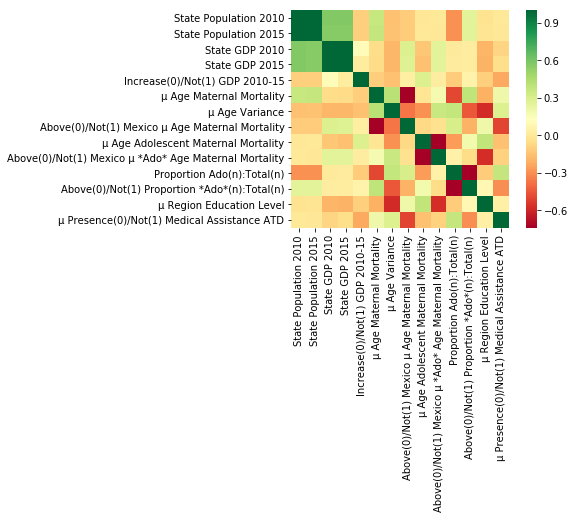

In [89]:
# Create a correlation dataframe
feature_corr = metro_gdp_mortality.corr()

# Plot a correlation heatmap
sns.heatmap(feature_corr, square=True, cmap='RdYlGn')

#### Further Data Cleaning: 
Since it appears that there is not correlation difference between columns with 2010 and 2015 values, the 2010 values can be removed from the dataset:
    - State Population
    - State GDP 

Additionally, if 'Above(0)/Not(1) Mexico μ Age Maternal Mortality' is the target variable, the following variables need to be removed because they correlate too much to the target variable and inevitably will give the Machine Learning Model the 'answer'
    - μ Age Maternal Mortality
    - μ Age Variance
    - μ Age Adolescent Maternal Mortality
    - Above(0)/Not(1) Mexico μ *Ado* Age Maternal Mortality
    - Proportion Ado(n):Total(n)
    - Above(0)/Not(1) Proportion *Ado*(n):Total(n)

In [90]:
#Remove columns as that are no longer needed
metro_gdp_mortality = metro_gdp_mortality.drop(columns=['State Population 2010', 
                                                        'State GDP 2010', 
                                                        'μ Age Maternal Mortality',
                                                        'μ Age Variance',
                                                        'μ Age Adolescent Maternal Mortality',
                                                        'Above(0)/Not(1) Mexico μ *Ado* Age Maternal Mortality',
                                                        'Proportion Ado(n):Total(n)',
                                                        'Above(0)/Not(1) Proportion *Ado*(n):Total(n)'])
metro_gdp_mortality.head()

,State,State Population 2015,State GDP 2015,Increase(0)/Not(1) GDP 2010-15,Above(0)/Not(1) Mexico μ Age Maternal Mortality,μ Region Education Level,μ Presence(0)/Not(1) Medical Assistance ATD
0,Aguascalientes,1044049,19528.0,0,0,4.56,0.16
1,Baja California,3315766,57136.0,0,1,4.42,0.16
4,Baja California Sur,272711,21431.0,0,1,4.83,0.16
5,Campeche,283025,NaN,1,1,4.12,0.14
6,Chiapas,1162592,13392.0,1,1,4.75,0.12


In [91]:
# Store merged metro_gdp_mortality dataset as a global variable
%store metro_gdp_mortality

Stored 'metro_gdp_mortality' (DataFrame)
